In [198]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [199]:
nltk.download('stopwords')
from nltk import word_tokenize, pos_tag
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [226]:
from nltk.probability import FreqDist
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "svg"
import matplotlib.pyplot as plt
!pip install pywaffle matplotlib
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# **Présentation du dataset et analyse des varaibles**

In [201]:
data = pd.read_csv("/content/sample_data/covid19_tweets[1].csv", nrows=15000)

In [202]:
data.shape

(15000, 13)

In [203]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         15000 non-null  object
 1   user_location     11957 non-null  object
 2   user_description  14187 non-null  object
 3   user_created      15000 non-null  object
 4   user_followers    15000 non-null  int64 
 5   user_friends      15000 non-null  int64 
 6   user_favourites   15000 non-null  int64 
 7   user_verified     15000 non-null  bool  
 8   date              15000 non-null  object
 9   text              15000 non-null  object
 10  hashtags          10639 non-null  object
 11  source            14998 non-null  object
 12  is_retweet        15000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 1.3+ MB


In [205]:
#lecture du 5 premiers lignes
data.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [206]:
#variable location
data['user_location'].value_counts()

India                           450
United States                   225
New Delhi, India                163
Mumbai, India                   142
London, England                 141
                               ... 
Ikuata, Nigeria                   1
Limousin, France                  1
Farnham, Surrey                   1
Planet Earth In The Cosmos        1
Austin, TX by way of Arizona      1
Name: user_location, Length: 4382, dtype: int64

In [207]:
#Top emplacements
import plotly.graph_objects as go
location = data['user_location'].str.split(expand=True).unstack().value_counts()
fig = go.Figure(
    data=[go.Bar(
            x = location.index.values[2:50],
            y = location.values[2:50],
            marker= dict(colorscale='GnBu',
                         color = location.values[2:100]
                        ))],
    layout_title_text="Top Emplacement"
)
fig.show(renderer="colab")

In [208]:
#utilisateurs vérifiés  
data['user_verified'].value_counts()

False    12973
True      2027
Name: user_verified, dtype: int64

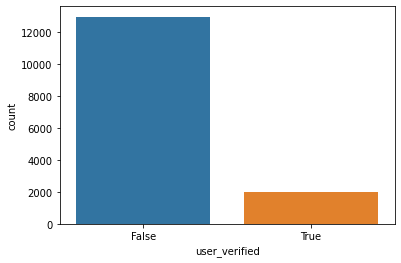

In [209]:
#diagramme de barre user verified 
sns.countplot(x='user_verified', data = data);

In [210]:
import plotly.graph_objects as go
source =data['source'].value_counts()
fig = go.Figure(
    data=[go.Bar(
            x = source.index.values[2:10],
            y = source.values[2:10],
            marker= dict(colorscale='RdPu',
                         color = source.values[2:10]
                        ),
            text='Source counts'
    )],
    layout_title_text="Les sources les plus fréquents"
)
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



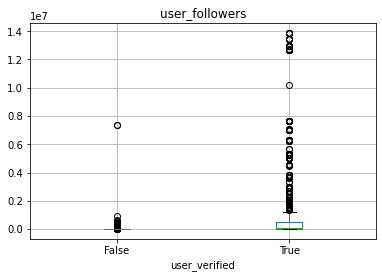

In [211]:
#user_followers par rapport user_vérfied
data.boxplot(column='user_followers',by="user_verified" )
plt.suptitle("")
plt.show()

# **Prétraitement du texte**

In [212]:
#Les mots les plus fréquents pas nettoyés dans les tweets
import plotly.graph_objects as go
all_words = data['text'].str.split(expand=True).unstack().value_counts()
fig = go.Figure(
    data=[go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )],
    layout_title_text="mots les plus fréquents (pas  nettoyés ) dans les tweets"
)
fig.show(renderer="colab")

In [213]:
#stockage des mots dans une chaine de caractére
all_text = ' '.join([text for text in data['text']]) 
print(len(all_text))
all_text[:400]

1965759


"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0 Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… h"

In [214]:
#Tokenization des mots 
all_text= all_text.lower()
word_all_text = nltk.word_tokenize(all_text)
word_all_text[:20]
print(len(word_all_text))

354034


In [215]:
#trouver les motes  plus  fréquence
fdist= FreqDist(word_all_text)
fdist.most_common(10)

[('#', 22636),
 (':', 17557),
 ('https', 14858),
 ('the', 8555),
 ('covid19', 8164),
 (',', 6649),
 ('@', 6582),
 ('.', 6190),
 ('to', 6045),
 ('of', 4879)]

In [216]:
#affichage des mots plus fréquents
#find the frequency
fdist= FreqDist(word_all_text)
#affichage 10 mot fréquent
fdist.most_common(10)

[('#', 22636),
 (':', 17557),
 ('https', 14858),
 ('the', 8555),
 ('covid19', 8164),
 (',', 6649),
 ('@', 6582),
 ('.', 6190),
 ('to', 6045),
 ('of', 4879)]

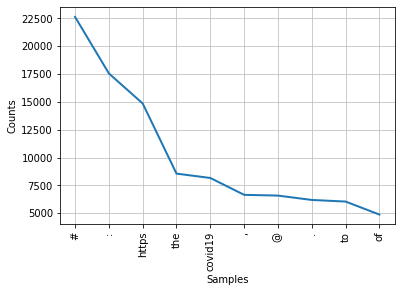

In [217]:
#Graphique des fréquences 
fdist.plot(10)

In [218]:
#nettoyage de mots vides 
stopwords = nltk.corpus.stopwords.words('english')
all_text_cleaned=[w.lower() for w in word_all_text if w not in stopwords and w.isalpha() 
                  and  w !='https' and not w.startswith('@') and not w.startswith('#')
and w != 'RT'  and  len(w) >= 3 ]
print(len(all_text_cleaned))
all_text_cleaned[:30]

126483


['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated',
 'hey',
 'yankees',
 'yankeespr',
 'mlb',
 'would',
 'made',
 'sense',
 'players',
 'pay',
 'respects',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'never',
 'claimed',
 'hoax',
 'claim',
 'effort',
 'brookbanktv',
 'one']

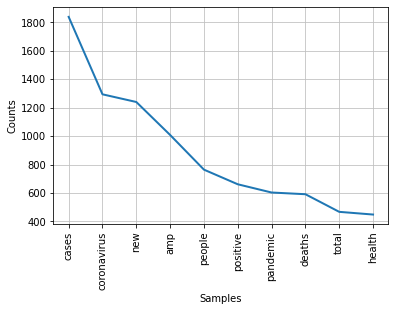

In [219]:
#graphique de fréquence des mots nettoyés 
fdist= FreqDist(all_text_cleaned)

fdist.plot(10)

In [220]:
#stemming
porter = nltk.PorterStemmer()
[porter.stem(t) for t in all_text_cleaned]

['smell',
 'scent',
 'hand',
 'sanit',
 'today',
 'someon',
 'past',
 'would',
 'think',
 'intox',
 'hey',
 'yanke',
 'yankeespr',
 'mlb',
 'would',
 'made',
 'sens',
 'player',
 'pay',
 'respect',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'never',
 'claim',
 'hoax',
 'claim',
 'effort',
 'brookbanktv',
 'one',
 'gift',
 'give',
 'appreci',
 'simpl',
 'thing',
 'alway',
 'around',
 'juli',
 'media',
 'bulletin',
 'novel',
 'coronavirusupd',
 'drsyedsehrish',
 'airnewsalert',
 'coronaviru',
 'death',
 'continu',
 'rise',
 'almost',
 'bad',
 'ever',
 'politician',
 'busi',
 'chang',
 'work',
 'gener',
 'recruit',
 'specif',
 'proactivetal',
 'wear',
 'face',
 'cover',
 'shop',
 'includ',
 'visit',
 'local',
 'commun',
 'pray',
 'good',
 'health',
 'recoveri',
 'chouhanshivraj',
 'covidposit',
 'pope',
 'god',
 'prophet',
 'sadhu',
 'sundar',
 'selvaraj',
 'watch',
 'hurricanehanna',
 'case',
 'still',
 'respons',
 'hrdministri',
 'cancel',
 'compart',
 'order',
 'logo',
 'graphicdesign'

In [221]:
#Lemmatization
WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in all_text_cleaned]

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated',
 'hey',
 'yankee',
 'yankeespr',
 'mlb',
 'would',
 'made',
 'sense',
 'player',
 'pay',
 'respect',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'never',
 'claimed',
 'hoax',
 'claim',
 'effort',
 'brookbanktv',
 'one',
 'gift',
 'give',
 'appreciation',
 'simple',
 'thing',
 'always',
 'around',
 'july',
 'medium',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'drsyedsehrish',
 'airnewsalerts',
 'coronavirus',
 'death',
 'continue',
 'rise',
 'almost',
 'bad',
 'ever',
 'politician',
 'business',
 'change',
 'work',
 'general',
 'recruiting',
 'specifically',
 'proactivetalent',
 'wear',
 'face',
 'covering',
 'shopping',
 'includes',
 'visit',
 'local',
 'community',
 'praying',
 'good',
 'health',
 'recovery',
 'chouhanshivraj',
 'covidpositive',
 'pope',
 'god',
 'prophet',
 'sadhu',
 'sundar',
 'selvaraj',
 'watch',
 'hurricanehanna',
 'case',
 'still',
 'response',
 'h

In [222]:
from nltk.probability import FreqDist
#frequence des mots 
fdist= FreqDist(all_text_cleaned)
#affichage 10 mot fréquent
fdist.most_common(10)

[('cases', 1839),
 ('coronavirus', 1294),
 ('new', 1240),
 ('amp', 1008),
 ('people', 764),
 ('positive', 661),
 ('pandemic', 603),
 ('deaths', 591),
 ('total', 467),
 ('health', 448)]

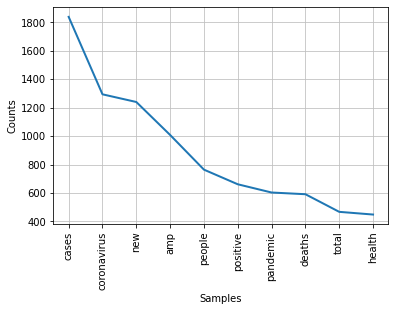

In [223]:
#graphique des fréquences 
fdist.plot(10)

## ***example Pos Tagging***

In [227]:
# stockage de  tweets dans une chaine de caractére
first_text = data.text.values[(3)]
second_text= data.text.values[7]
words_first_text = nltk.word_tokenize(first_text+ second_text);

stopwords = stopwords.words('english')

first_text_list_cleaned = [word for word in words_first_text
                           if word.lower() not in stopwords  and word.isalpha() and len(word) >= 3 ]

# POS  Tagging
tokenized =nltk.word_tokenize(" ".join(first_text_list_cleaned))

for word in tokenized :
    tagged_words =nltk.pos_tag(tokenized)
tagged_words

[('brookbanktv', 'NN'),
 ('one', 'CD'),
 ('gift', 'NN'),
 ('give', 'VB'),
 ('appreciation', 'NN'),
 ('simple', 'JJ'),
 ('things', 'NNS'),
 ('always', 'RB'),
 ('around', 'IN'),
 ('https', 'NN'),
 ('wear', 'JJ'),
 ('face', 'NN'),
 ('coverings', 'NNS'),
 ('shopping', 'VBG'),
 ('includes', 'VBZ'),
 ('visit', 'NN'),
 ('local', 'JJ'),
 ('Community', 'NNP'),
 ('https', 'NN')]

# **Example BOW**

In [228]:
#BOW
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
sentence1 = "i love learning python"
sentence2 = "learning python is good"
vectorizer = CountVectorizer(ngram_range=(2,2),stop_words='english')

Count_data = vectorizer.fit_transform([sentence1,sentence2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=vectorizer.get_feature_names())
print(cv_dataframe)
#print(vectorizer.vocabulary_ )

   learning python  love learning  python good
0                1              1            0
1                1              0            1


# **Nettoyage et stockage du texte nettoyé dans un nouveau dataframe**

In [229]:
stopwords = nltk.corpus.stopwords.words('english')
all_text = pd.DataFrame(data['text'])
all_text.head()
cleanedt =""
n,m= all_text.shape
alltext_clean = pd.DataFrame(columns=['text'])
for i in range(0,n):
    cleanedt =" "
    #tokenization
    for w in nltk.word_tokenize(all_text.iloc[i,0]):
        #garder que les mot utiles et eliminer les mot d'arrêt et les mot qui commence par des caractéres spéciaux
        if not w in stopwords and w !='https' and not w.startswith('@') and not w.startswith('\\') and not w.startswith('#') and  len(w) >= 3 :
          
            cleanedt += w.lower() + " "

    alltext_clean.loc[i,'text']= cleanedt

# **Wordcloud**

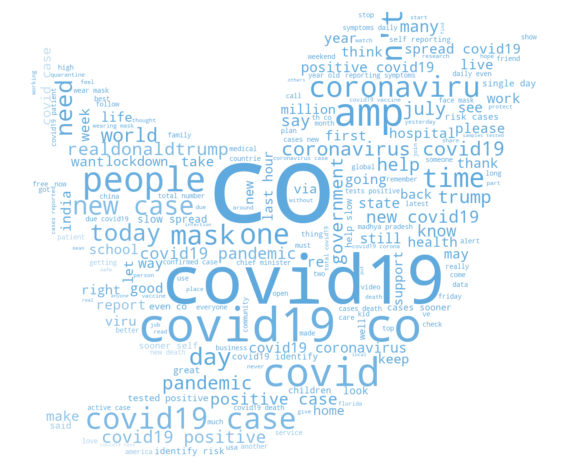

In [231]:
from PIL import Image
import requests
 
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color = 'WHITE', height = 400, width = 600, mask = Mask).generate((" ".join(alltext_clean['text'])))
plt.figure(figsize = (10, 20))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()

# **Ngrams**

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(alltext_clean['text'],(1,1),20)
bigram_df=ngram_df(alltext_clean['text'],(2,2),20)
trigram_df=ngram_df(alltext_clean['text'],(3,3),20)

In [233]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
    ),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "green"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "purple"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show(renderer="colab")
